In [4]:
import tensorflow as tf

In [5]:
from tensorflow.keras.datasets.fashion_mnist import load_data

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [7]:
(X_train, y_train), (X_test, y_test) = load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [11]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

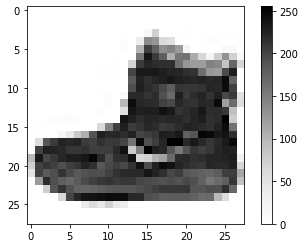

In [13]:
plt.figure()
plt.imshow(X_train[0], cmap='Greys')
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
y_train[0]

9

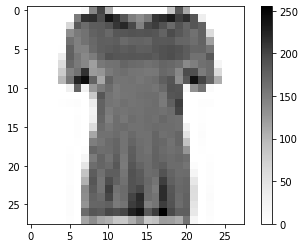

In [17]:
plt.imshow(X_train[10], cmap='Greys')
plt.colorbar()
plt.grid(False)
plt.show()

In [19]:
y_train[10]

0

In [20]:
mapa_kategorii = {
    0 : 'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'
}

In [22]:
mapa_kategorii[y_train[10]]

'T-shirt/top'

In [24]:
X_train = X_train / 255.0

In [26]:
y_train = y_train.astype(np.int32)

In [28]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy']
)

In [30]:
model.fit(X_train, y_train, epochs=2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 10s 159us/sample - loss: 1.4339 - accuracy: 0.6964
Epoch 2/2
60000/60000 [==============================] - 9s 151us/sample - loss: 1.2540 - accuracy: 0.7084


In [32]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=2)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

60000/1 - 4s - loss: 1.1975 - accuracy: 0.7122
Loss: 1.182941035970052
Accuracy: 0.7121666669845581


In [34]:
X_test = X_test / 255.0

In [36]:
y_test = y_test.astype(np.int32)

In [38]:
y_pred = model.predict(X_test, steps = 10)
print(y_pred.shape)

(10000, 10)


In [40]:
y_pred[0]

array([0.01870979, 0.02185447, 0.02904607, 0.02440536, 0.02567141,
       0.2643965 , 0.03176106, 0.22912887, 0.10614441, 0.24888206],
      dtype=float32)

In [42]:
np.argmax(y_pred[0])

5

In [44]:
mapa_kategorii[np.argmax(y_pred[0])]

'Sandal'

In [46]:
mapa_kategorii[y_test[0]]

'Ankle boot'

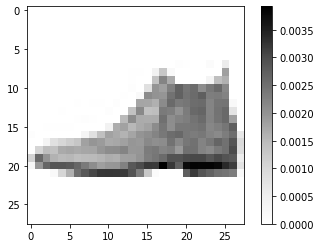

In [47]:
plt.imshow(X_test[0], cmap='Greys')
plt.colorbar()
plt.grid(False)
plt.show()

(0, 1)

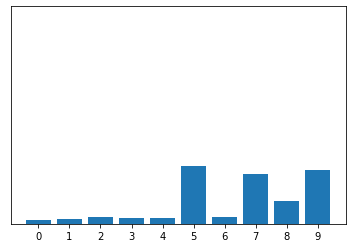

In [49]:
plt.grid(False)
plt.xticks(range(10))
plt.yticks([])
plt.bar(range(10), y_pred[0])
plt.ylim([0, 1])

In [51]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Loss :", loss)
print("Accuracy :", accuracy)

10000/1 - 1s - loss: 1.1627 - accuracy: 0.7076
Loss : 1.1886377384185791
Accuracy : 0.7076


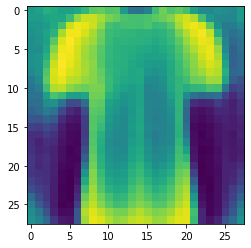

In [54]:
nr_kategorii = 0
mapa_aktywacji = []
for elem in model.weights[0].numpy():
    mapa_aktywacji.append(elem[nr_kategorii])
    
plt.imshow(np.array(mapa_aktywacji).reshape(28, 28))

In [73]:
def decode_img(filepath):
    img = tf.io.read_file(filepath)
    img = tf.image.decode_jpeg(img, channels=1)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return tf.image.resize(img, [28, 28])

In [77]:
lista_plikow = tf.data.Dataset.list_files(str('/home/kba/Pobrane/buty.jpg'))

In [78]:
moj_test = lista_plikow.map(decode_img)

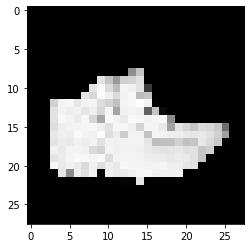

In [80]:
obraz = None
for elem in moj_test.take(1):
    obraz = elem.numpy()

plt.imshow(obraz.reshape(28, 28), cmap='Greys')
plt.show()

In [82]:
y_pred_moj = model.predict(obraz.reshape(1, 784))

In [84]:
y_pred_moj

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [87]:
mapa_kategorii[np.argmax(y_pred_moj)]

'Bag'

(0, 1)

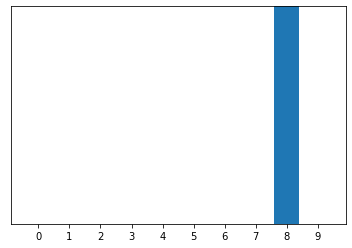

In [89]:
plt.grid(False)
plt.xticks(range(10))
plt.yticks([])
plt.bar(range(10), y_pred_moj[0])
plt.ylim([0, 1])

In [91]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((3, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model2.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy']
)

In [94]:
model2.fit(X_train.reshape(60000, 28, 28, 1), y_train, epochs=2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 33s 545us/sample - loss: 0.5387 - accuracy: 0.8072
Epoch 2/2
60000/60000 [==============================] - 32s 540us/sample - loss: 0.5109 - accuracy: 0.8199


In [95]:
for weight in model2.weights:
    print(weight.shape)

(3, 3, 1, 32)
(32,)
(2592, 10)
(10,)
